In [1]:
from pybaseball import team_pitching
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#collect historic team pitching data from pybaseball
pitching_data = team_pitching(1900,2016)

In [5]:
#a quick look at the data
print("data shape: {}").format(pitching_data.shape)

print(pitching_data.head())

data shape: (2460, 20)
  Season       Team      W     L    SV      G     GS      IP     SO   K/9  \
1   1907       Cubs  107.0  44.0   8.0  200.0  155.0  1373.1  586.0  3.84   
2   1909       Cubs  104.0  49.0  11.0  212.0  155.0  1409.1  680.0  4.34   
3   1906       Cubs  115.0  36.0  10.0  187.0  154.0  1388.1  702.0  4.55   
4   1910  Athletics  102.0  48.0   5.0  200.0  155.0  1421.2  789.0  4.99   
5   1909  Athletics   95.0  58.0   3.0  214.0  153.0  1378.0  728.0  4.75   

   BB/9  HR/9  BABIP   LOB%  GB%  HR/FB   ERA   FIP  xFIP   WAR  
1  2.63  0.07  0.241  0.747  NaN    NaN  1.73  2.31   NaN  17.8  
2  2.32  0.04  0.248  0.745  NaN    NaN  1.74  2.08   NaN  22.4  
3  2.89  0.08  0.238  0.757  NaN    NaN  1.75  2.43   NaN  17.6  
4  2.85  0.05  0.254  0.731  NaN    NaN  1.79  2.23   NaN  16.4  
5  2.52  0.06  0.251  0.737  NaN    NaN  1.93  2.08   NaN  15.1  


In [7]:
# some summary stats
pitching_data.describe()

,W,L,SV,G,GS,IP,SO,K/9,BB/9,HR/9,BABIP,LOB%,GB%,HR/FB,ERA,FIP,xFIP,WAR
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,450.000000,450.000000,2460.000000,2460.000000,450.000000,2460.000000
mean,78.135366,78.135366,27.294715,414.617073,156.939837,1402.272276,800.954472,5.104598,3.236748,0.725545,0.282952,0.703174,0.441962,0.105998,3.861809,3.849037,4.189156,13.845935
std,13.540774,13.474811,14.757541,144.634809,8.992996,82.564637,261.353634,1.543454,0.531561,0.330695,0.015073,0.034746,0.022116,0.014720,0.698738,0.619960,0.348521,4.627145
min,36.000000,36.000000,0.000000,146.000000,103.000000,922.100000,245.000000,1.850000,1.490000,0.030000,0.238000,0.564000,0.382000,0.069000,1.730000,1.920000,3.330000,-0.500000
25%,69.000000,69.000000,14.000000,295.000000,154.000000,1378.000000,571.750000,3.780000,2.900000,0.500000,0.272000,0.684750,0.426250,0.096000,3.420000,3.500000,3.940000,10.700000
50%,79.000000,78.000000,29.000000,398.000000,161.000000,1430.050000,811.000000,5.155000,3.220000,0.770000,0.283000,0.708000,0.441000,0.104000,3.860000,3.900000,4.200000,13.900000
75%,88.000000,88.000000,39.000000,538.000000,162.000000,1450.000000,999.000000,6.260000,3.570000,0.980000,0.294000,0.727000,0.457000,0.116000,4.320000,4.260000,4.430000,16.900000
max,116.000000,120.000000,68.000000,768.000000,165.000000,1506.200000,1510.000000,9.350000,5.520000,1.610000,0.340000,0.795000,0.525000,0.159000,6.710000,5.830000,5.130000,29.500000


In [11]:
# get league-average SO/game by year
league_average = pitching_data.groupby('Season', as_index=False)['K/9'].mean()

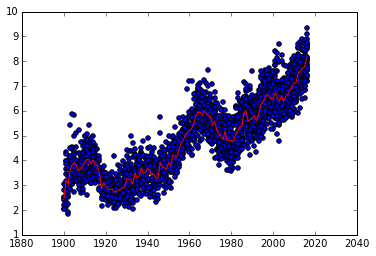

In [13]:
# plot avg. SO/game over time
plt.scatter(pitching_data['Season'], pitching_data['K/9'])
plt.plot(league_average['Season'], league_average['K/9'], c='red')